In [1]:
from models.random_forest import RandomForest

desire = 'Shop'
choice_type = 'mode'
experiment_id = 'randomforest01'

model = RandomForest(data_dir='data')

# loss, age_error, income_error = model.run_experiment(
#     experiment_id, 1000, desire, choice_type)

for num_sample in range(1, 11):
    num_sample = num_sample * 2000
    print(f"experiment_id: {experiment_id}, num_sample: {num_sample}")
    loss, age_error, income_error = model.run_experiment(
        experiment_id, num_sample, desire, choice_type)
    print(f"loss: {loss}, age_error: {age_error}, income_error: {income_error}")

experiment_id: randomforest01, num_sample: 2000


TypeError: run_experiment() takes from 1 to 2 positional arguments but 5 were given

In [2]:
import os
import json
import pandas as pd
import numpy as np


experiment_dir = f'data/experiments/{experiment_id}'
columns = ['experiment_id', 'num_sample', 'desire', 'choice_type', 'loss', 'brier_score', 'age_group_error',
           'income_group_error', 'family_structure_error', 'household_size_error', 'vehicles_error', 'mean_error']
experiment_results = pd.DataFrame(columns=columns)
for file in os.listdir(experiment_dir):
    if file.endswith('.json'):
        with open(os.path.join(experiment_dir, file)) as f:
            experiment_results.loc[len(experiment_results)] = json.load(f)
experiment_results.head()

,experiment_id,num_sample,desire,choice_type,loss,brier_score,age_group_error,income_group_error,family_structure_error,household_size_error,vehicles_error,mean_error
0,randomforest01,2000,Eat,mode,1.002961,0.201611,0.125921,0.141822,0.110234,0.107717,0.131912,0.123521
1,randomforest01,18000,Eat,mode,0.989792,0.198420,0.156708,0.151225,0.135649,0.145627,0.171560,0.152154
2,randomforest01,10000,Eat,mode,0.993812,0.199229,0.197166,0.203906,0.170302,0.182068,0.220548,0.194798
3,randomforest01,8000,Eat,mode,1.003389,0.200402,0.155806,0.146254,0.130536,0.128536,0.155414,0.143309
4,randomforest01,12000,Eat,mode,0.992662,0.199043,0.161571,0.157463,0.141606,0.136347,0.173248,0.154047


In [8]:
experiment_results = experiment_results[experiment_results['num_sample'] <= 20000]

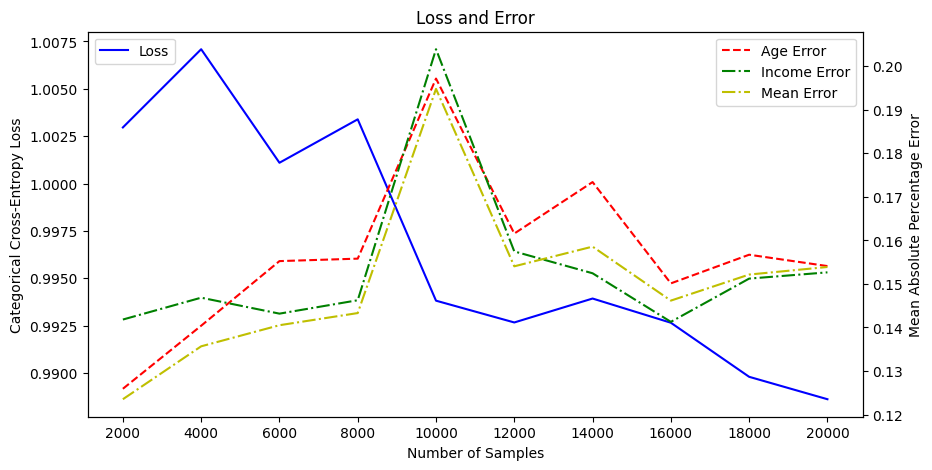

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot accuracy on the primary y-axis
sns.lineplot(data=experiment_results, x='num_sample',
             y='loss', ax=ax1, color='b', label='Loss')
# sns.lineplot(data=experiment_results, x='num_sample',
#              y='brier_score', ax=ax1, color='#880E4F', label='Average Brier Score')

ax1.set_title('Loss and Error')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Categorical Cross-Entropy Loss')
ax1.legend(loc='upper left')

# Create a second y-axis for the errors
ax2 = ax1.twinx()
sns.lineplot(data=experiment_results, x='num_sample', y='age_group_error',
             ax=ax2, color='r', linestyle='--', label='Age Error')
sns.lineplot(data=experiment_results, x='num_sample', y='income_group_error',
             ax=ax2, color='g', linestyle='-.', label='Income Error')
sns.lineplot(data=experiment_results, x='num_sample', y='mean_error',
             ax=ax2, color='y', linestyle='-.', label='Mean Error')
ax2.set_ylabel('Mean Absolute Percentage Error')
ax2.legend(loc='upper right')

# Optional: Set xticks if needed
ax1.set_xticks(experiment_results['num_sample'])

plt.show()